# Importation des librairies python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importation et nettoyage des données

## Importation des données - liaison

In [2]:
# Importation des données - fichier liaison
liaison = pd.read_excel("Desktop/Openclassrooms/P5_Shibin_YANG/liaison.xlsx")

/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


### Vérification des données

In [3]:
# Vérification des données
liaison

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
820,7203,NaN
821,7204,NaN
822,7247,13127-1
823,7329,14680-1


In [4]:
# Vérification du type des données, du nombre des colonnes et de la présence des valeurs manquantes
liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


### Création d'une nouvelle dataframe en supprimant les valeurs manquantes

In [5]:
# Création d'une nouvelle dataframe nommée liaisonNonNull en supprimant les lignes sans valeur de la dataframe d'origine

# Les valeurs manquantes ici, peut-être le stagiaire n'a pas de temps à les tous mettre ou bien les produits qui n'ont pas mis en vente en ligne
liaisonNonNull = liaison.dropna(how='any')
liaisonNonNull

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
792,7023,15891
793,7025,15887
822,7247,13127-1
823,7329,14680-1


### Réinitialisation de l’index

In [6]:
# Réinitialisation de l’index
liaisonNonNull.reset_index(inplace=True, drop=True)
liaisonNonNull

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
729,7023,15891
730,7025,15887
731,7247,13127-1
732,7329,14680-1


### Vérification des doublons

In [7]:
# Vérification des doublons car le product_id et id_web servent comme la clés pour faire la jointure après
if len(liaisonNonNull['product_id'].unique()) < len(liaisonNonNull.index) or len(liaisonNonNull['id_web'].unique()) < len(liaisonNonNull.index):
    print("duplicate found")
else:
    print('no duplicate found')

no duplicate found


## Importation des données - web

In [8]:
# Importation des données - fichier web
web = pd.read_excel("Desktop/Openclassrooms/P5_Shibin_YANG/web.xlsx")

/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


### Vérification des données

In [9]:
# Vérification des données
web

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [10]:
# Vérification du type des données, du nombre des colonnes et de la présence des valeurs manquantes

# Ici, on doit bien remarquer que les valeurs dans la colonne 'sku' et la colonne 'post_title' ont un différent de 2
# Cela signifie qu'il y a deux produits qui n'ont pas de sku id
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

In [11]:
# Localisation des produits n'ayant pas de sku id

# 2 produits sans sku id, mais ils ne sont tous pas vendu, donc, pas d'impact sur le calcul du CA
web.loc[web['sku'].isna() & web['post_title'].notna()]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
470,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-07-31 12:07:23,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
471,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-08-08 11:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


### Création d'une nouvelle dataframe en supprimant les lignes sans sku ID

In [12]:
# 1428/1513 lignes dans la colonne 'sku' possèdent de valeurs

# Comme la colonne 'sku' sert comme la clè pour chaque produit, 
# un produit sans la valeur ID ne permet pas d'ensuite pour calculer le CA
# Donc, ici, on crée d'une nouvelle dataframe nommée webID en supprimant les lignes sans valeur
webID = web.dropna(subset=['sku'])
webID

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


### Vérification des doublons

In [13]:
# Vérification des doublons

# Comme on le savait dèjà, les valeurs dans la colonne 'sku' est la clè de chaque produit
# On n'a pas besoin de deux individus qui correspondent à un même produit
# On doit trouver où sont les doublons
if len(webID['sku'].unique()) < len(webID.index):
    print("duplicate found")
else:
    print("no duplicate found")

duplicate found


### Supression des doublons

In [14]:
# Vérification le nombre des produits
len(webID['post_title'].unique())

711

In [15]:
# On peut observer qu'un sku id est toujours lié avec deux lignes
# Si on vérifie la colonne 'post_type',
# en fait, il y a une ligne correspond à un produit, une autre correspond à un attachment de même produit
len(webID['post_type'].unique())

2

In [16]:
webID['post_type'].unique()

array(['product', 'attachment'], dtype=object)

In [17]:
# On peut donc créer d'une nouvelle dataframe nommée webDédoubler
# en supprimant les doublons sous condition de garder toujours les lignes pour lesquelles on a la colonne 'post_type' = 'produit' mais ≠ 'attachment'
webDédoubler = webID[webID['post_type'] == 'product']
webDédoubler

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,16135,0,0,0,0.0,5.0,taxable,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
767,15891,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
768,15887,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
797,13127-1,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


### Vérification si un sku ID correspond à un seul produit

In [18]:
# Vérification des doublons pour la colonne 'post_title' afin d'assurer un sku id correspond à un seul produit
if len(webDédoubler['post_title'].unique()) < len(webDédoubler.index):
    print("duplicate found")
else:
    print("no duplicate found")

duplicate found


### Réinitialisation de l’index

In [19]:
# Réinitialisation de l’index pour ensuite trouver les lignes des produits doublés
webDédoubler.reset_index(inplace=True, drop=True)
webDédoubler

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,16135,0,0,0,0.0,5.0,taxable,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
710,15891,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
711,15887,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
712,13127-1,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


### Recherche des produits doublés

In [20]:
# Recherche des produits doublés
doublonProduit = webDédoubler.duplicated('post_title')
print(doublonProduit)

0      False
1      False
2      False
3      False
4      False
       ...  
709    False
710    False
711    False
712     True
713    False
Length: 714, dtype: bool


In [21]:
# Localisation des produits doublés
doublonProduit[doublonProduit == True]

490    True
698    True
712    True
dtype: bool

In [22]:
webDédoubler.loc[[490, 698, 712], ['sku', 'total_sales','post_title', 'post_name']]

,sku,total_sales,post_title,post_name
490,14828,0.0,Marc Colin Et Fils Chassagne-Montrachet Blanc ...,marc-colin-et-fils-chassagne-montrachet-blanc-...
698,16068,1.0,Domaine Hauvette IGP Alpilles Jaspe 2017,domaine-hauvette-igp-alpilles-jaspe-2017
712,13127-1,0.0,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,clos-du-mont-olivet-chateauneuf-du-pape-2007-2


In [23]:
webDédoubler.query(
    "post_title in 'Marc Colin Et Fils Chassagne-Montrachet Blanc Les Vide-Bourses 1er Cru 2016'")

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
230,14000,0,0,0,0.0,2.0,taxable,NaN,2.0,2018-04-13 13:32:03,...,marc-colin-et-fils-chassagne-montrachet-blanc-...,2019-10-07 09:30:10,2019-10-07 07:30:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
490,14828,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-11-26 09:52:56,...,marc-colin-et-fils-chassagne-montrachet-blanc-...,2020-03-27 09:30:10,2020-03-27 08:30:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [24]:
webDédoubler.query("post_title in 'Domaine Hauvette IGP Alpilles Jaspe 2017'")

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
185,15292,0,0,0,0.0,1.0,taxable,NaN,2.0,2018-02-28 13:43:33,...,domaine-hauvette-igp-alpilles-jaspe-2017-2,2020-08-27 10:24:18,2020-08-27 08:24:18,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
698,16068,0,0,0,0.0,1.0,taxable,NaN,2.0,2020-02-22 14:28:32,...,domaine-hauvette-igp-alpilles-jaspe-2017,2020-08-26 16:05:02,2020-08-26 14:05:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [25]:
webDédoubler.query("post_title in 'Clos du Mont-Olivet Châteauneuf-du-Pape 2007'")

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
469,16034,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-09-25 15:35:26,...,clos-du-mont-olivet-chateauneuf-du-pape-2007,2020-08-21 14:25:03,2020-08-21 12:25:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
712,13127-1,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


**Je support qu’un sku id correspond à un seul produit, dans notre cas, cela peut-être concerne du mal saisie, mais il faut quand même de vous montrer afin de pouvoir les vérifier, comme il s’agit seulement 3 références avec peu de vente, cela ne donne pas beaucoup d’impact sur le calcul du CA. Donc, je les garde.**

### Renommage de la colonne 'sku' en 'id_web'

In [26]:
# Renommage de la colonne 'sku'
webDédoubler = webDédoubler.rename(columns={'sku': 'id_web'})
webDédoubler

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,16135,0,0,0,0.0,5.0,taxable,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
710,15891,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
711,15887,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
712,13127-1,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


## Importation des données - erp

In [27]:
# Importation des données - fichier erp
erp = pd.read_excel("Desktop/Openclassrooms/P5_Shibin_YANG/erp.xlsx")

/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


### Vérification des données

In [28]:
# Vérification des données
erp

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock
...,...,...,...,...,...
820,7203,0,45.0,30,instock
821,7204,0,45.0,9,instock
822,7247,1,54.8,23,instock
823,7329,0,26.5,14,instock


In [29]:
# Vérification du type des données, du nombre des colonnes et de la présence des valeurs manquantes
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


### Vérification des doublons

In [30]:
# Vérification des doublons
if len(erp['product_id'].unique()) < len(erp.index):
    print("duplicate found")
else:
    print('no duplicate found')

no duplicate found


# Jointure des dataframes

## Recherche de différence selon 'id_web' entre deux df - liaisonNonNull & webDédoubler

In [31]:
# Vérification des produits en vente en ligne, mais manquent de données

# En effet, il y a de différence pour la colonne 'id_web' dans les deux dataframe,
# la dataframe liaisonNonNull a 20 valeurs de plus que celle de webDédoubler,
# qui correspond aux produits mis en vente en ligne, mais on n'a pas d'assez d'informations
diff_id_web = list(set(liaisonNonNull.id_web.unique()
                       ).difference(webDédoubler.id_web.unique()))
diff_id_web

[13577,
 14730,
 15630,
 14360,
 15272,
 14377,
 15529,
 14379,
 15154,
 14648,
 12601,
 14785,
 13771,
 15065,
 14689,
 15586,
 '14680-1',
 15608,
 15609,
 14715]

In [32]:
list_shape = np.array(diff_id_web).shape
print(list_shape)

(20,)


## Jointure des deux dataframes liaisonNonNull et webDédoubler

In [33]:
# Jointure des deux dataframes liaisonNonNull et webDédoubler

# Nous avons ici bien 29 colonnes après la jointure, on n'a pas perdu les colonnes,
# mais on a perdu 20 lignes de données par rapport à la dataframe liaisonNonNull,
# qui corresponds bien aux valeurs vérifiées précédentes
df = pd.merge(liaisonNonNull, webDédoubler, how='inner', on='id_web')
df

,product_id,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,3847,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,3849,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,3850,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,4032,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,4039,19815,0,0,0,0.0,0.0,taxable,NaN,2.0,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,6930,16135,0,0,0,0.0,5.0,taxable,NaN,2.0,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
710,7023,15891,0,0,0,0.0,0.0,taxable,NaN,2.0,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
711,7025,15887,0,0,0,0.0,0.0,taxable,NaN,2.0,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
712,7247,13127-1,0,0,0,0.0,0.0,taxable,NaN,2.0,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


## Recherche de différence selon 'product_id' entre deux df - erp & df

In [34]:
# Vérification des produits enregistrés en BDD ERP, mais peut-être pas mis en vente en ligne

# En effet, il y a de différence pour la colonne 'product_id' dans les deux dataframe,
# la dataframe erp a 111 valeurs de plus que celle de df,
# qui correspond aux produits enregistrés en BDD ERP, mais peut-être pas mis en vente en ligne
diff_product_id = list(
    set(erp.product_id.unique()).difference(df.product_id.unique()))
diff_product_id

[7168,
 7169,
 7170,
 7192,
 7193,
 7194,
 7195,
 7196,
 7200,
 7201,
 7203,
 7204,
 4659,
 4692,
 4693,
 4697,
 4698,
 4702,
 4090,
 4195,
 4092,
 4209,
 4721,
 4738,
 4741,
 4744,
 4233,
 7329,
 6821,
 6824,
 6825,
 6826,
 5800,
 5805,
 5808,
 7159,
 6324,
 4278,
 4279,
 6327,
 4798,
 4289,
 6864,
 6866,
 6869,
 6875,
 6898,
 6899,
 6900,
 6901,
 6902,
 6903,
 6904,
 6905,
 6906,
 6907,
 6908,
 6909,
 4864,
 4869,
 4874,
 4911,
 4921,
 4922,
 5952,
 5953,
 5954,
 5955,
 5957,
 7008,
 7009,
 7010,
 7015,
 4973,
 5505,
 5017,
 5018,
 5020,
 5021,
 7081,
 7084,
 7085,
 7086,
 7087,
 7088,
 5559,
 5560,
 5569,
 6594,
 5570,
 5070,
 5075,
 6100,
 4565,
 4055,
 4568,
 7131,
 7132,
 7133,
 7136,
 4577,
 4578,
 7137,
 4584,
 6125,
 4594,
 4599,
 7161,
 7162,
 7163,
 7164]

In [35]:
list_shape = np.array(diff_product_id).shape
print(list_shape)

(111,)


## Jointure des deux dataframes df (liaisonNonNull + webDédoubler) et erp

In [36]:
# Jointure des deux dataframes df(liaisonNonNull + webDédoubler) et erp

# Nous avons ici bien 33 colonnes après la jointure, on n'a pas perdu les colonnes,
# mais on a perdu 111 lignes de données par rapport à la dataframe erp,
# qui corresponds bien aux valeurs vérifiées précédentes
df1 = pd.merge(df, erp, how='inner', on='product_id')
df1

,product_id,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,...,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,onsale_web,price,stock_quantity,stock_status
0,3847,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,...,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1,24.2,0,outofstock
1,3849,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,...,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1,34.3,0,outofstock
2,3850,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,...,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1,20.8,0,outofstock
3,4032,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,...,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1,14.1,0,outofstock
4,4039,19815,0,0,0,0.0,0.0,taxable,NaN,2.0,...,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1,46.0,0,outofstock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,6930,16135,0,0,0,0.0,5.0,taxable,NaN,2.0,...,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1,8.4,83,instock
710,7023,15891,0,0,0,0.0,0.0,taxable,NaN,2.0,...,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1,27.5,15,instock
711,7025,15887,0,0,0,0.0,0.0,taxable,NaN,2.0,...,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1,69.0,2,instock
712,7247,13127-1,0,0,0,0.0,0.0,taxable,NaN,2.0,...,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1,54.8,23,instock


# Calcul du CA

## Création d'une nouvelle dataframe en séléctionnant les colonnes qui nous intéressent

In [37]:
# Création d'une nouvelle dataframe en séléctant les colonnes qui nous intéressent
webSales = df1[['product_id', 'id_web', 'total_sales', 'post_title',
                'guid', 'onsale_web', 'price', 'stock_quantity', 'stock_status']]
webSales

,product_id,id_web,total_sales,post_title,guid,onsale_web,price,stock_quantity,stock_status
0,3847,15298,6.0,Pierre Jean Villa Saint-Joseph Préface 2018,https://www.bottle-neck.fr/?post_type=product&...,1,24.2,0,outofstock
1,3849,15296,0.0,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,https://www.bottle-neck.fr/?post_type=product&...,1,34.3,0,outofstock
2,3850,15300,0.0,Pierre Jean Villa Crozes-Hermitage Accroche Co...,https://www.bottle-neck.fr/?post_type=product&...,1,20.8,0,outofstock
3,4032,19814,3.0,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,https://www.bottle-neck.fr/?post_type=product&...,1,14.1,0,outofstock
4,4039,19815,0.0,Pierre Jean Villa Côte Rôtie Carmina 2017,https://www.bottle-neck.fr/?post_type=product&...,1,46.0,0,outofstock
...,...,...,...,...,...,...,...,...,...
709,6930,16135,5.0,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,https://www.bottle-neck.fr/?post_type=product&...,1,8.4,83,instock
710,7023,15891,0.0,Camin Larredya Jurançon Sec La Virada 2018,https://www.bottle-neck.fr/?post_type=product&...,1,27.5,15,instock
711,7025,15887,0.0,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,https://www.bottle-neck.fr/?post_type=product&...,1,69.0,2,instock
712,7247,13127-1,0.0,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,https://www.bottle-neck.fr/?post_type=product&...,1,54.8,23,instock


## Calcul du CA par produit

In [38]:
# Calcul du CA par produit
webSales['CA/produit'] = webSales['total_sales']*webSales['price']
webSales

/var/folders/3x/73jrnyf924x3lmhm3jq5w7j40000gn/T/ipykernel_43571/1563600726.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  webSales['CA/produit'] = webSales['total_sales']*webSales['price']


,product_id,id_web,total_sales,post_title,guid,onsale_web,price,stock_quantity,stock_status,CA/produit
0,3847,15298,6.0,Pierre Jean Villa Saint-Joseph Préface 2018,https://www.bottle-neck.fr/?post_type=product&...,1,24.2,0,outofstock,145.2
1,3849,15296,0.0,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,https://www.bottle-neck.fr/?post_type=product&...,1,34.3,0,outofstock,0.0
2,3850,15300,0.0,Pierre Jean Villa Crozes-Hermitage Accroche Co...,https://www.bottle-neck.fr/?post_type=product&...,1,20.8,0,outofstock,0.0
3,4032,19814,3.0,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,https://www.bottle-neck.fr/?post_type=product&...,1,14.1,0,outofstock,42.3
4,4039,19815,0.0,Pierre Jean Villa Côte Rôtie Carmina 2017,https://www.bottle-neck.fr/?post_type=product&...,1,46.0,0,outofstock,0.0
...,...,...,...,...,...,...,...,...,...,...
709,6930,16135,5.0,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,https://www.bottle-neck.fr/?post_type=product&...,1,8.4,83,instock,42.0
710,7023,15891,0.0,Camin Larredya Jurançon Sec La Virada 2018,https://www.bottle-neck.fr/?post_type=product&...,1,27.5,15,instock,0.0
711,7025,15887,0.0,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,https://www.bottle-neck.fr/?post_type=product&...,1,69.0,2,instock,0.0
712,7247,13127-1,0.0,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,https://www.bottle-neck.fr/?post_type=product&...,1,54.8,23,instock,0.0


## Calcul du CA total

In [39]:
# Calcul du CA total
CATotal = webSales['CA/produit'].sum()
CATotal

70568.6

# Recherche des outliers - variable 'price'

## Calcul statistique descriptive

In [40]:
# Calcul statistique descriptive de la colonne 'price'
webSales['price'].describe()

count    714.000000
mean      32.493137
std       27.810525
min        5.200000
25%       14.100000
50%       23.550000
75%       42.175000
max      225.000000
Name: price, dtype: float64

## Graphique histogramme - Nombre de référence des produits par catégorie de prix

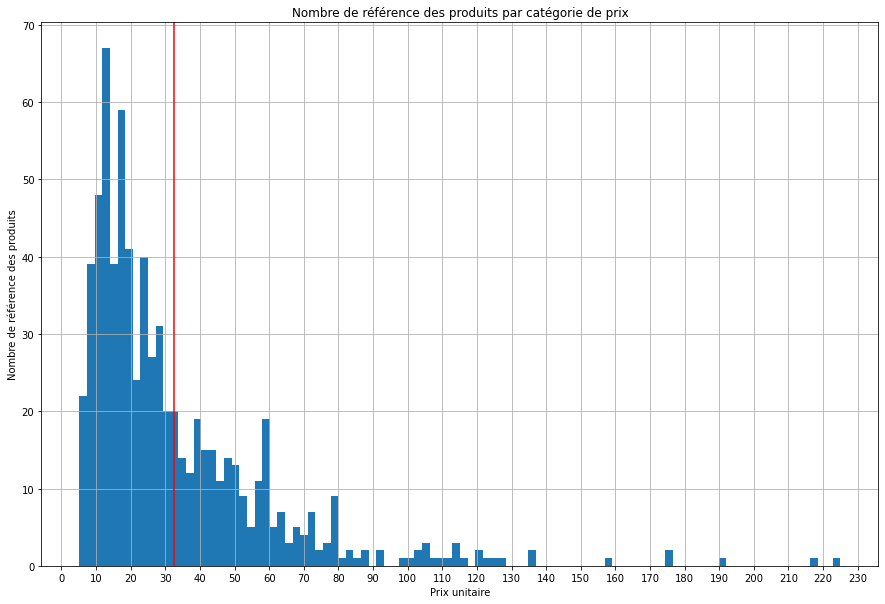

In [41]:
# Graphique histogramme - Nombre de référence des produits par catégorie de prix
# afin pour montrer qu'il y a pas mal des produits qui ont un prix beaucoup plus élevé par rapport au prix moyen
plt.figure(figsize=(15, 10))
webSales['price'].hist(density=False, bins=100)
plt.xticks([10*i for i in range(24)])
plt.axvline(x=32.5, color='r', linestyle='-')
plt.ylabel('Nombre de référence des produits')
plt.xlabel('Prix unitaire')
plt.title('Nombre de référence des produits par catégorie de prix')
plt.show()

## Graphique boîte à moustaches de la variable 'price'

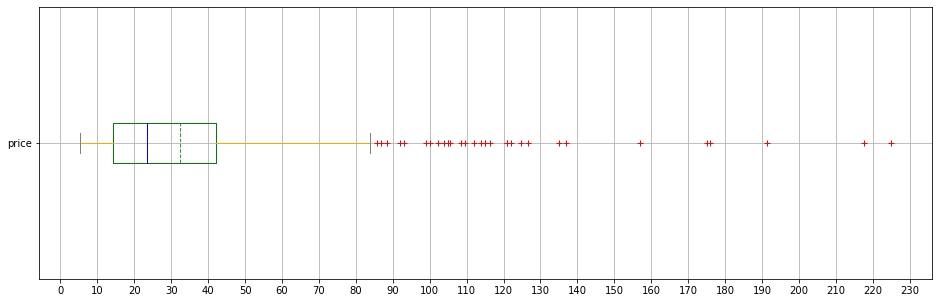

In [42]:
# Graphique boîte à moustaches de la variable 'price'
# afin pour montrer s'il y a des outliers
# donc,ici,on a pas mal de valeurs extrême, supérieur à 1.5 fois d'écart interquantile
color = {"boxes": "Green", "whiskers": "Orange",
         "medians": "Blue", "caps": "Gray"}
webSales[['price']].boxplot(
    figsize=(16, 5), color=color, sym="r+", vert=False, showmeans=True, meanline=True)
plt.xticks([10*i for i in range(24)])
plt.show()

## Recherche des outliers

In [43]:
# Définition de recherche afin pour trouver les outliers
def recherche_outlier(price):
    Q1 = np.quantile(price, 0.25)
    Q3 = np.quantile(price, 0.75)
    IQ = Q3-Q1
    IQ_left = Q1-1.5*IQ
    IQ_right = Q3+1.5*IQ
    i = list(price.index[(price < IQ_left) | (price > IQ_right)])
    val = list(price[i])
    return i, val

In [44]:
# Localisation les index des outliers trouvés
outliers = recherche_outlier(webSales['price'])
outliers[0]

[63,
 65,
 199,
 201,
 205,
 218,
 219,
 221,
 222,
 227,
 380,
 381,
 426,
 431,
 432,
 437,
 438,
 502,
 511,
 553,
 587,
 602,
 603,
 604,
 642,
 647,
 648,
 653,
 654,
 655,
 656,
 657]

In [45]:
# Localisation les valeurs des outliers trouvés
outliers = recherche_outlier(webSales['price'])
outliers[1]

[100.0,
 88.4,
 225.0,
 126.5,
 85.6,
 176.0,
 108.5,
 157.0,
 104.0,
 109.6,
 102.3,
 137.0,
 217.5,
 105.0,
 105.0,
 112.0,
 86.8,
 92.0,
 124.8,
 175.0,
 191.3,
 93.0,
 122.0,
 114.0,
 135.0,
 105.6,
 116.4,
 115.0,
 121.0,
 99.0,
 115.0,
 121.0]

## Résultat

In [46]:
# Création de la dataframe des outliers trouvés
# Nous avons ici 32 outliers détectés
price_outliers = webSales.loc[outliers[0]]
price_outliers.sort_values(by='price')

,product_id,id_web,total_sales,post_title,guid,onsale_web,price,stock_quantity,stock_status,CA/produit
205,4359,13853,1.0,Champagne Larmandier-Bernier Grand Cru Les Che...,https://www.bottle-neck.fr/?post_type=product&...,1,85.6,0,outofstock,85.6
438,5026,13913,0.0,Champagne Agrapart &amp; Fils Minéral Extra Br...,https://www.bottle-neck.fr/?post_type=product&...,1,86.8,2,instock,0.0
65,4132,11668,0.0,Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...,https://www.bottle-neck.fr/?post_type=product&...,1,88.4,5,instock,0.0
502,5565,19822,0.0,Tempier Bandol Cabassaou 2017,https://www.bottle-neck.fr/?post_type=product&...,1,92.0,0,outofstock,0.0
602,5916,14774,0.0,Wemyss Malts Single Cask Scotch Whisky Chocola...,https://www.bottle-neck.fr/?post_type=product&...,1,93.0,3,instock,0.0
655,6214,11601,0.0,Domaine des Comtes Lafon Volnay 1er Cru Champa...,https://www.bottle-neck.fr/?post_type=product&...,1,99.0,7,instock,0.0
63,4115,15382,0.0,Zind-Humbrecht Riesling Grand Cru Rangen De Th...,https://www.bottle-neck.fr/?post_type=product&...,1,100.0,11,instock,0.0
380,4903,14805,0.0,Domaine Des Croix Corton Grand Cru Les Grèves ...,https://www.bottle-neck.fr/?post_type=product&...,1,102.3,20,instock,0.0
222,4407,3509,1.0,Cognac Frapin Cigar Blend,https://www.bottle-neck.fr/?post_type=product&...,1,104.0,6,instock,104.0
432,5008,11602,0.0,Domaine des Comtes Lafon Volnay 1er Cru Santen...,https://www.bottle-neck.fr/?post_type=product&...,1,105.0,10,instock,0.0


In [47]:
price_outliers.shape

(32, 10)

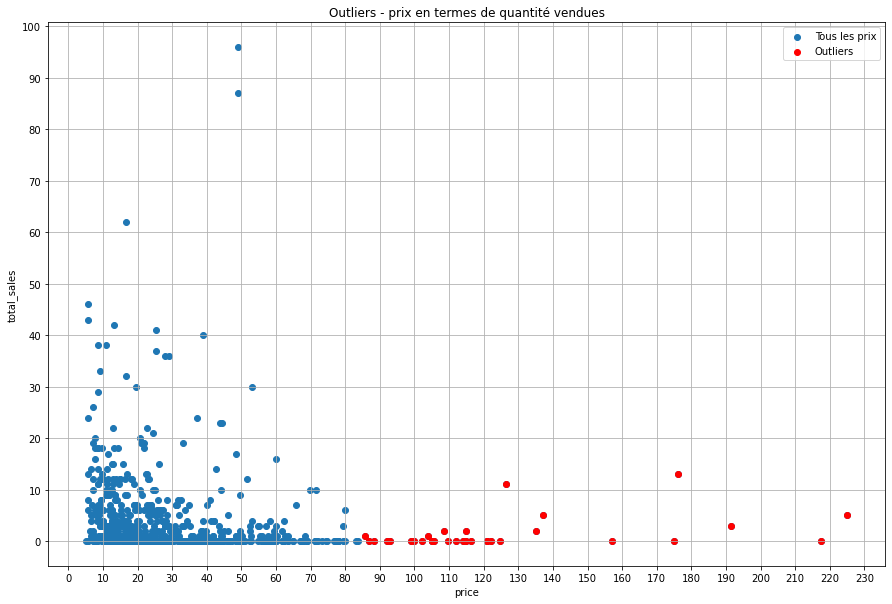

In [48]:
# Graphique nuage de points nous montre la relation entre le prix et la quantité vendue de chaque produit
# Même si le prix sont beaucoup prix élevé, mais on a vendu quand même certain produits
plt.figure(figsize=(15, 10))
plt.scatter(webSales['price'], webSales['total_sales'], label='Tous les prix')
plt.scatter(price_outliers['price'],
            price_outliers['total_sales'], color='red', label='Outliers')
plt.grid(True)
plt.xlabel("price")
plt.ylabel("total_sales")
plt.xticks([10*i for i in range(24)])
plt.yticks([10*i for i in range(11)])
plt.title('Outliers - prix en termes de quantité vendues')
plt.legend(loc='upper right')
plt.show()

**Conclusion:** 

**- Nous avons réalisé un CA au total de 70 K euros par rapport à la vente en ligne**

**- 32 valeurs aberrantes détectées concernant le prix des produits mis en vente en ligne** 


**Recommantation:**

**Comme les valeurs aberrantes influencent certains paramètres statistiques, par exemple, la moyenne. Cela peut fausser notre compréhension du jeu de données et nous conduire à émettre des hypothèses erronées sur ce dernier.**

**La question se pose alors comment on va traiter ces valeurs, nous avons normalement 3 possibilité:**

**- soit on les supprime car ce n’est plausible ou logique,**

**- soit on garde l'observation car c'est peut-être d'une donnée extrême et rare, mais plausible,**

**- soit on corrige par une imputation.**

**Dans notre cas, il est tout à fait possible qu'une bouteille de vin coûte autant de valeur, on garde cette observation, mais il faut quand même vérifier ces prix par rapport à notre prix d'achat et le prix du vente au marché. Le seul but est toujours d'augmenter le CA sans se soucier de la marge.**